# RNN for predicting the top acceleration

In [1]:
import torch 
import pandas as pd 
import pickle
import numpy as np
import os
import sys 

from torch.utils.data import Dataset, DataLoader
from torch import nn
import torch.nn.functional as F
import torch.optim as optim


import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
from tqdm import trange

sns.set_theme()

In [5]:
import torch_geometric

In [2]:
path = r'FLAC\FLAC2D - Case 1a\data'

In [3]:
# Read all the csv files in the directory
def read_files(path):
    files = os.listdir(path)
    data = {}
    for file in files:
        data[file] = pd.read_csv(os.path.join(path, file))

    return data

# Read the data
data = read_files(path)

In [4]:
time_array = data["Data_100.000_1.000_0.500.csv"].iloc[:,0].values

Text(0, 0.5, 'Acceleration (m/s^2)')

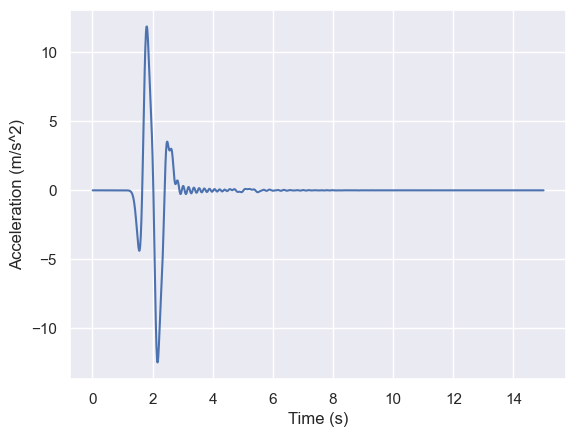

In [30]:
data['Data_100.000_1.000_0.500.csv'].plot(x=0, y=2, legend=False)
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m/s^2)")

In [15]:
import re
files = os.listdir(path)

# Extract the parameters from the file names
re_str = r'Data_(\d+\.\d+)_(\d+\.\d+)_(\d+\.\d+).csv'
params = []
for file in files:
    match = re.match(re_str, file)
    if match:
        params.append(list(map(float, match.groups())))
    else:
        print("No match found for file: ", file)

params = np.array(params)

In [21]:
def ricker_wavelet(f, t0, t):
    return (1 - 2 * np.pi ** 2 * f ** 2 * (t - t0) ** 2) * np.exp(-np.pi ** 2 * f ** 2 * (t - t0) ** 2)

In [ ]:
idx = 0
f = params[idx][1]
t0 = params[idx][2]